# Myocardial sensitivity analysis results -- Visualization

In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from math import ceil 

from ansys.heart.postprocessor.EPpostprocessor import EPpostprocessor
import matplotlib.pyplot as plt
import re

2024/02/16 11:43:09 - DEBUG - pyheart_global - __init__ - <module> - Loaded logging module as LOG
2024/02/16 11:43:11 - INFO -  - mesher - <module> - Showing Fluent gui: False


## SA on MC endo percentage: epi fixed 0.42 (endo/mid) and change endo percentage

In [2]:
param_doc = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_SA_Sigma_15\SA_sigma_12Lead.csv"

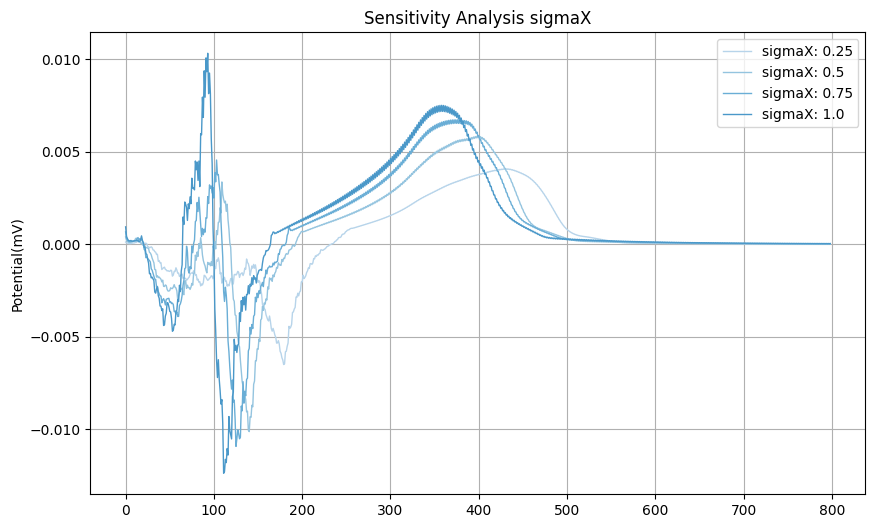

In [3]:
parameters_df = pd.read_csv(param_doc)

colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# color_index = [0.3, 0.5, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 6))

for i, row_data in parameters_df.iterrows():
    percent = row_data['sigmaX']
    color = colormap(color_index[i])
    lead_II = np.fromstring(row_data['II'][1:-1], sep=' ')  
    x_values = np.arange(len(lead_II))
    plt.plot(
        x_values,
        lead_II, 
        label="sigmaX: "+str(row_data['sigmaX']), 
        color=color,
        linewidth=1
    )
    if i >= 3:
        break


plt.legend()

plt.title('Sensitivity Analysis sigmaX')
# plt.xlabel('Time(ms)')
plt.ylabel('Potential(mV)')
plt.grid(True)

plt.show()

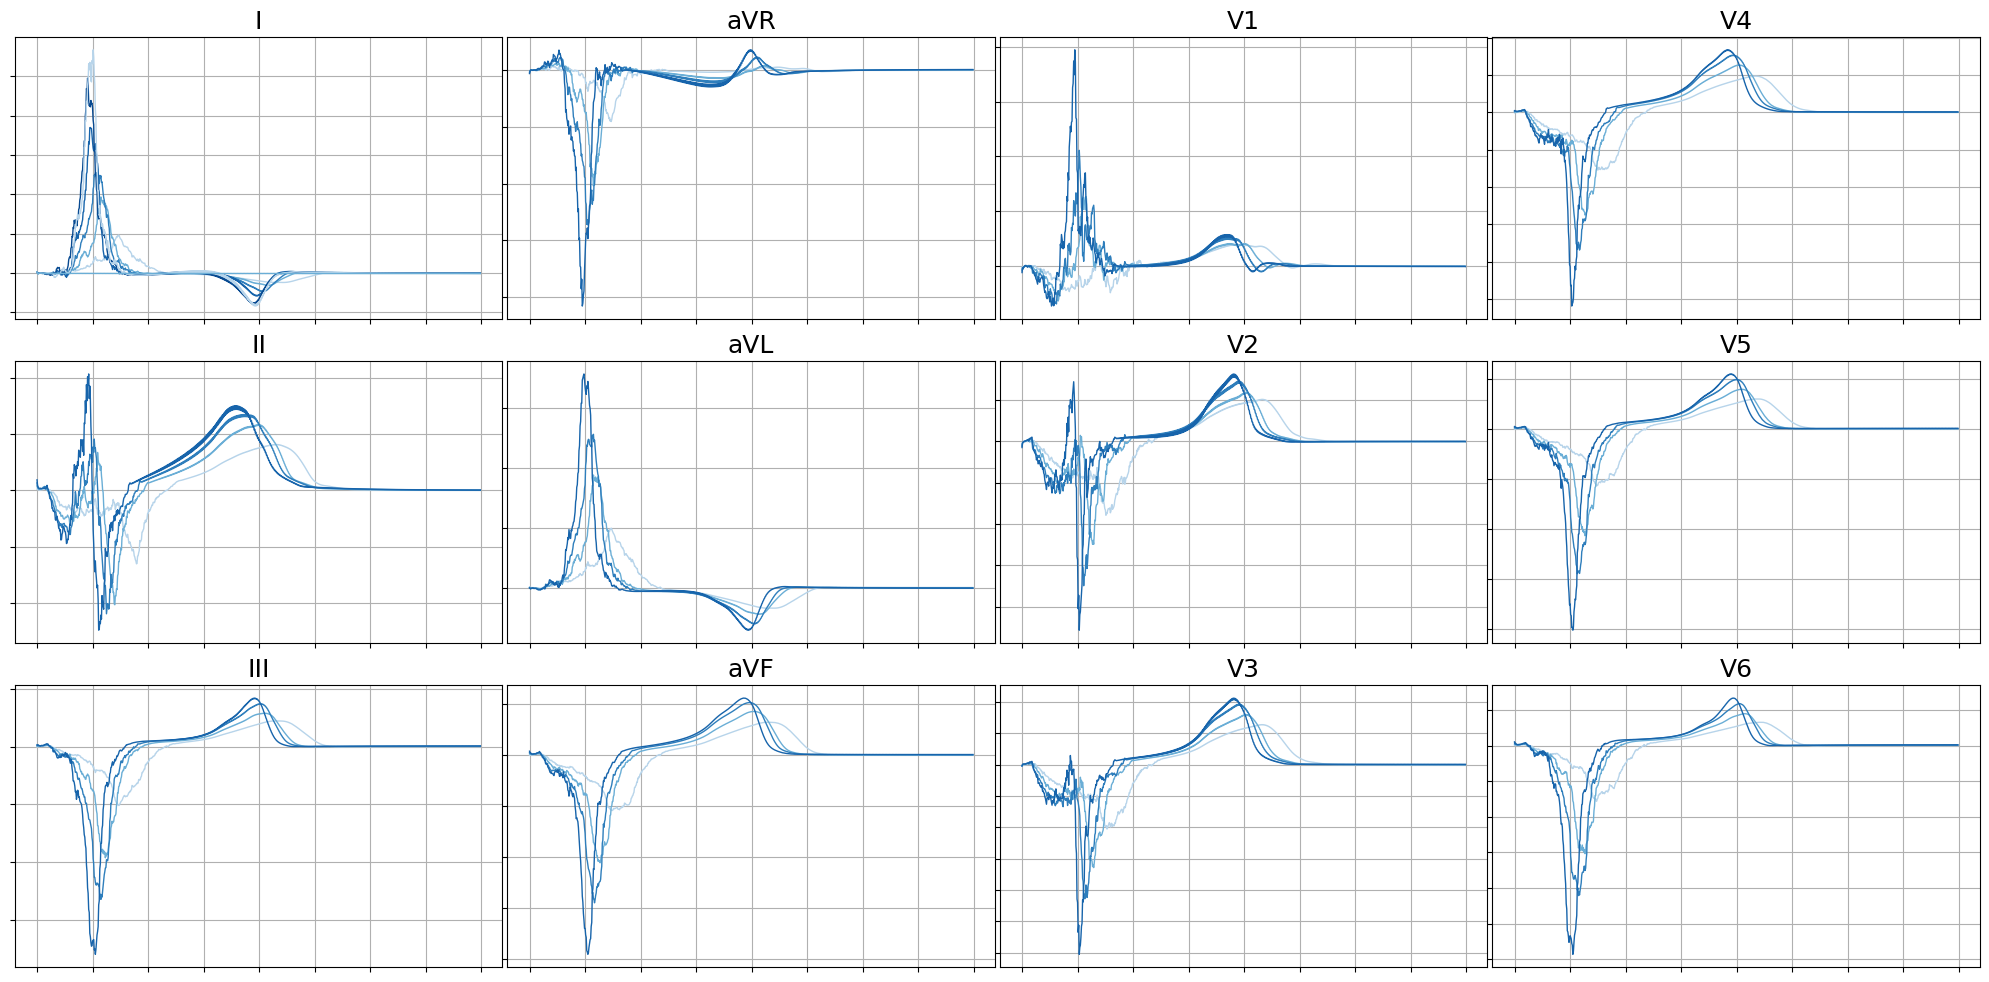

In [23]:
colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
# color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
color_index = [0.3, 0.5, 0.7, 0.8, 0.9]

# df = pd.DataFrame(ECGs, columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'RA', 'LA', 'RL', 'LL'])


# mean_shape_ecg_csv = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_PCA\simulation-EP\sa_pca_ecgs\mean_shape.csv"
# mean_shape_ecg = pd.read_csv(mean_shape_ecg_csv)
# plt.plot(
#     mean_shape_ecg['LL']-mean_shape_ecg['RA'], 
#     label='mean_shape', 
#     color='black',
#     linewidth=2.5
# )

parameters_df = pd.read_csv(param_doc)

plt.figure(figsize=(20, 10))
for i, row_data in parameters_df.iterrows():
    sigma = row_data['sigmaX']

    leads = {
        'I': row_data['I'],
        'II': row_data['II'],
        'III': row_data['III'],
        'aVR': row_data['aVR'],
        'aVL': row_data['aVL'],
        'aVF': row_data['aVF'],
        'V1': row_data['V1'],
        'V2': row_data['V2'],
        'V3': row_data['V3'],
        'V4': row_data['V4'],
        'V5': row_data['V5'],
        'V6': row_data['V6']
    }
    # print(leads)
    # for j, (lead_name, lead_data) in enumerate(leads.items()):
    #     ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
    #     color = colormap(color_index[i])
    #     # print(j, lead_name, lead_data)
    #     ax.plot(lead_data, label=f"Percent: {percent}", color=color, linewidth=1.5)
    #     ax.tick_params(labelbottom=False, labelleft=False)  # Hide tick labels
    #     ax.grid(True)  # Add grid to the subplot

    for j, (lead_name, lead_data_str) in enumerate(leads.items()):

        lead_data = np.fromstring(lead_data_str[1:-1], sep=' ')
        
        ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
        color = colormap(color_index[i % len(color_index)]) 
        ax.plot(lead_data, label=f"sigmaX: {sigma}", color=color, linewidth=1)
        # ax.legend()     
        ax.set_title(lead_name, fontsize=18) 
        ax.tick_params(labelbottom=False, labelleft=False) 
        ax.grid(True)
        if i >= 4:
            break


# plt.legend(fontsize=18, loc='lower right') 
plt.tight_layout()
plt.subplots_adjust(wspace=0.01, hspace=0.15) 
plt.subplots_adjust(top=0.95)
plt.show()